# House Price prediction using Machine Learning

### Importing Libraries

In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

### Importing Dataset


The dataset contains 13 features :


| number      | Field Name   | Description                                                               |
|-------------|--------------|---------------------------------------------------------------------------|
| 1           | Id           | To count the records.                                                     |
| 2           | MSSubClass   | Identifies the type of dwelling involved in the sale.                     |
| 3           | MSZoning     | Identifies the general zoning classification of the sale.                 |
| 4           | LotArea      | Lot size in square feet.                                                  |
| 5           | LotConfig    | Configuration of the lot.                                                 |
| 6           | BldgType     | Type of dwelling.                                                         |
| 7           | OverallCond  | Rates the overall condition of the house.                                  |
| 8           | YearBuilt    | Original construction year.                                               |
| 9           | YearRemodAdd | Remodel date (same as construction date if no remodeling or additions).   |
| 10          | Exterior1st  | Exterior covering on house.                                               |
| 11          | BsmtFinSF2   | Type 2 finished square feet.                                              |
| 12          | TotalBsmtSF  | Total square feet of basement area.                                       |
| 13          | SalePrice    | To be predicted.                                                          |

In [4]:
ds= pd.read_excel('./dataset/HousePricePrediction.xlsx')

# Printing first 8 records of the dataset
ds.head(8)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0


As we have imported the data. So shape method will show us the dimension of the dataset.

In [5]:
ds.shape

(2919, 13)

### Data Preprocessing

Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [6]:
obj_cols= ds.select_dtypes(include=['object']).columns
int_cols= ds.select_dtypes(include=['int64']).columns
flt_cols= ds.select_dtypes(include=['float64']).columns

print(f'Categorical Variables: {len(obj_cols)}')
print(f'Integer Variables: {len(int_cols)}')
print(f'Float VARIABLES: {len(flt_cols)}')

Categorical Variables: 4
Integer Variables: 6
Float VARIABLES: 3


### Exploratary Data Analysis

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.
So here let’s make a $heatmap$ using seaborn library.

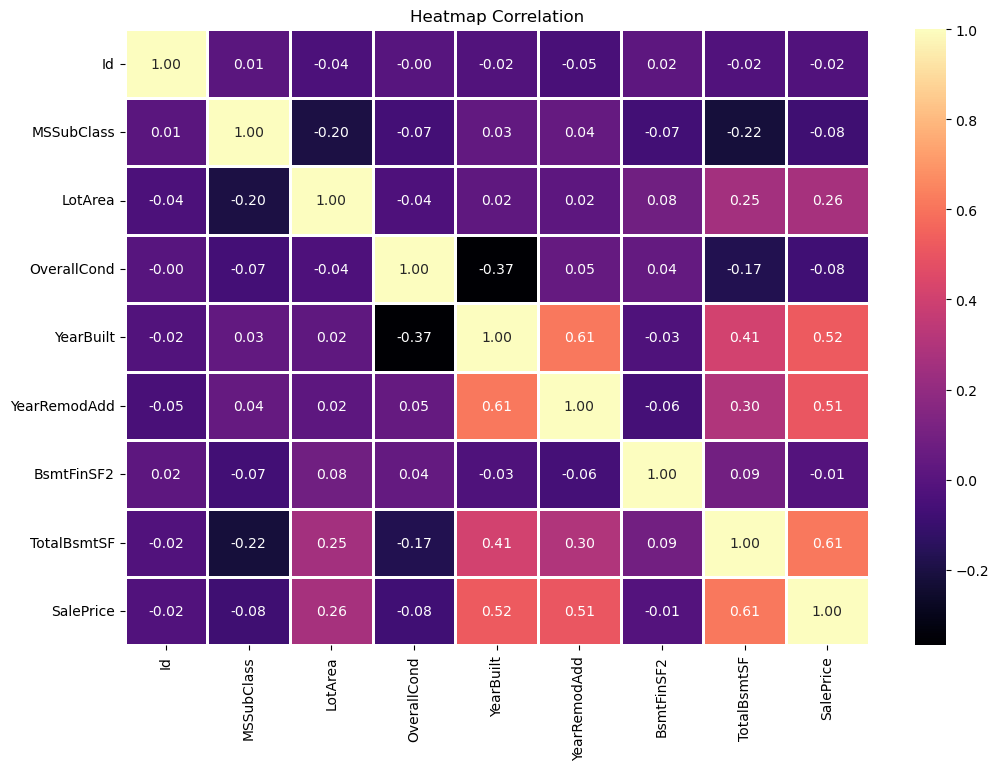

In [7]:
# Select only numerical features for correlation analysis
numerical_features= ds.select_dtypes(include=['number'])
plt.figure(figsize= (12, 8))
sns.heatmap(numerical_features.corr(), 
            cmap= 'magma', 
            fmt= '.2f',
            linewidths= 2,
            annot= True)
plt.title('Heatmap Correlation')
plt.show()

To analyze the different categorical features. Let’s draw the barplot.

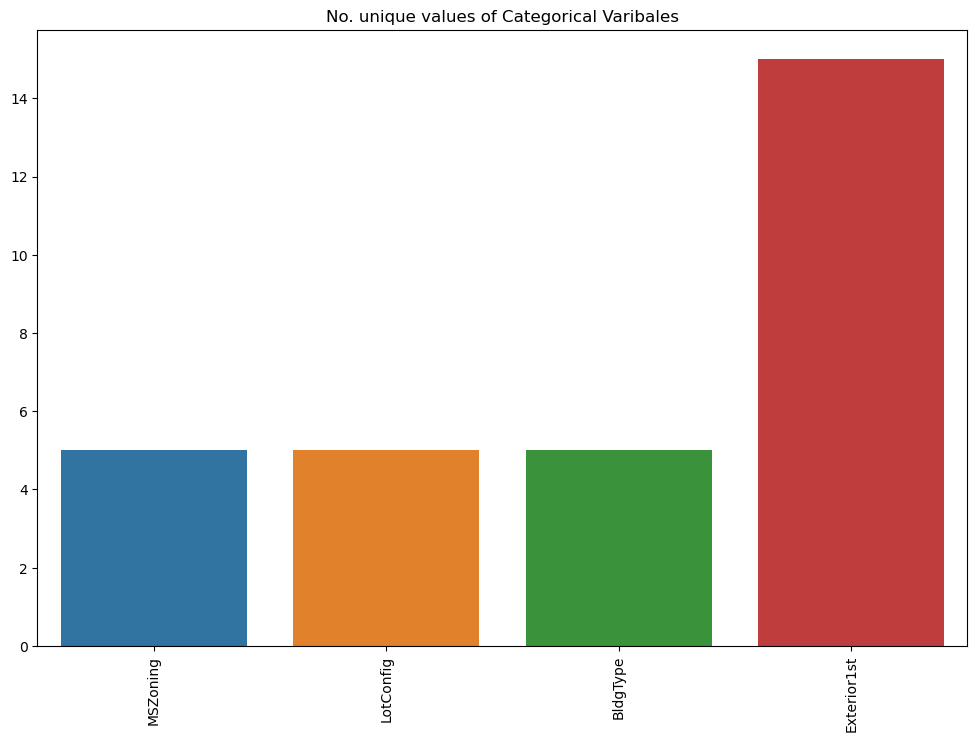

In [8]:
unique_vals= []
for col in obj_cols:
    unique_vals.append(ds[col].nunique())
plt.figure(figsize= (12, 8))
plt.title('No. unique values of Categorical Varibales')
plt.xticks(rotation= 90)
sns.barplot(x= obj_cols, y= unique_vals)
plt.show()

The plot shows that Exterior1st has 16 unique categories and other features have around 5 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

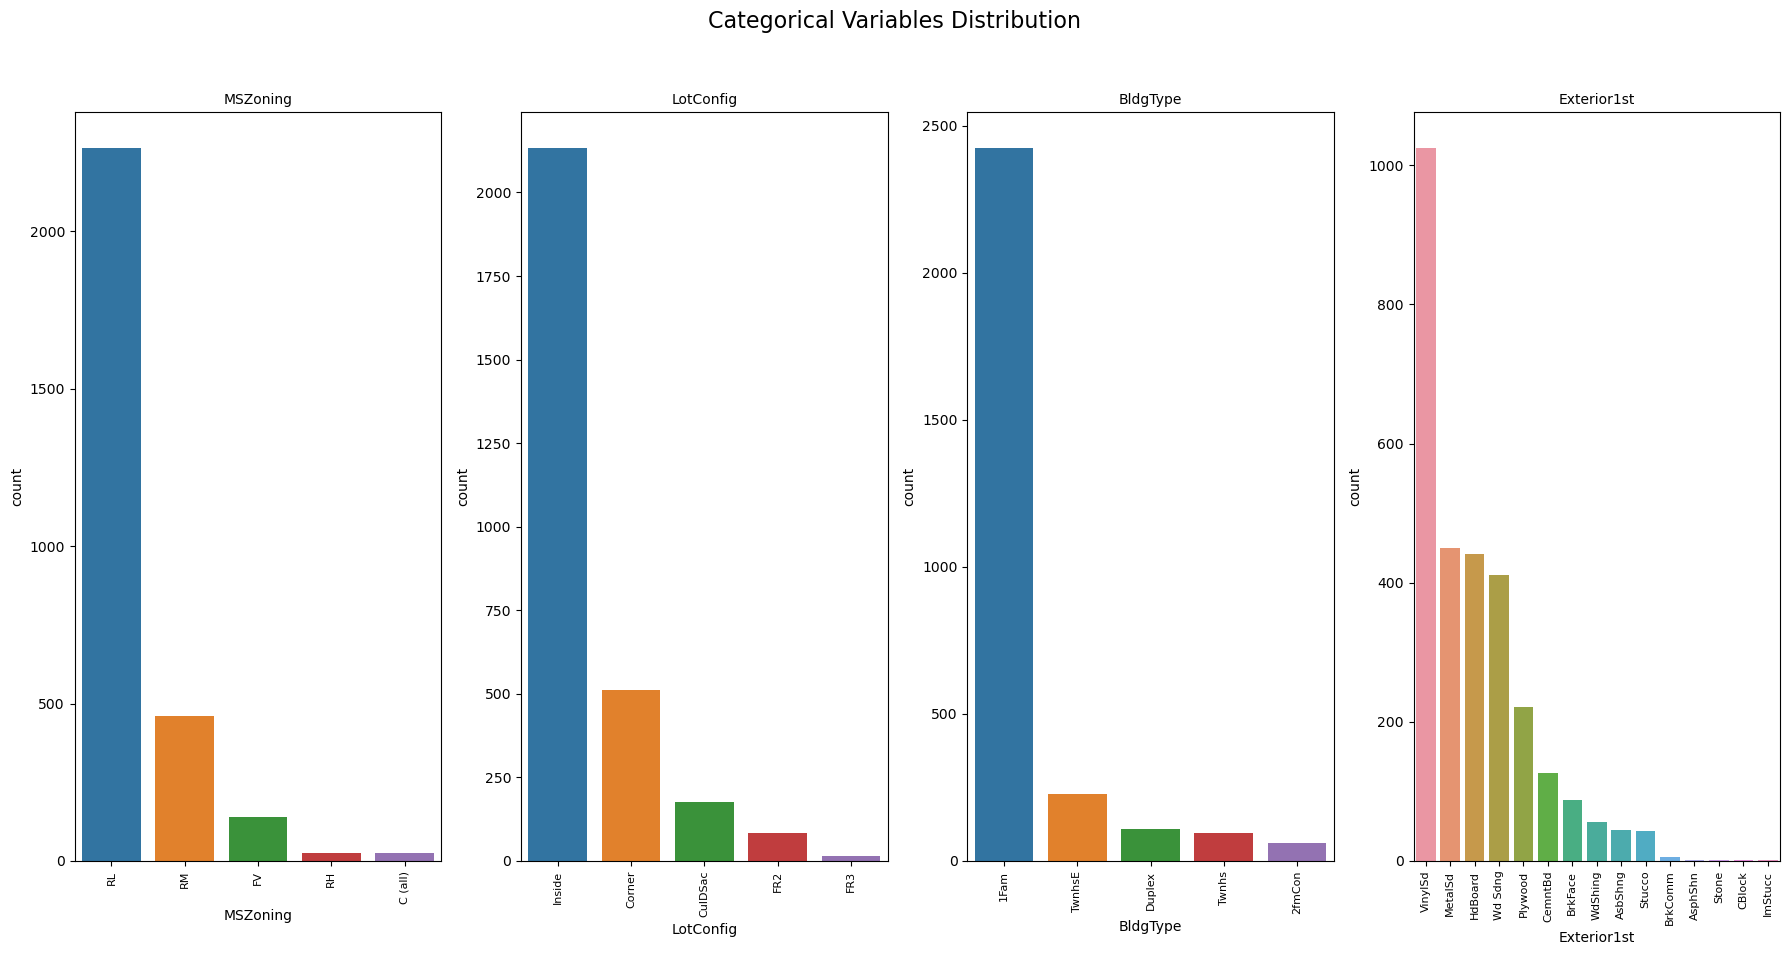

In [9]:
plt.figure(figsize= (18, 10))
plt.suptitle('Categorical Variables Distribution', fontsize= 16)
plt.xticks(rotation= 90)
#Calculate the number of rows needed for subplots using math.ceil for ceiling division
n_rows= ceil(len(obj_cols)/ 4)

for index, col in enumerate(obj_cols, start= 1):
    plt.subplot(n_rows, 4, index)
    y= ds[col].value_counts()
    sns.countplot(data= ds, x= col, order=y.index)
    plt.xticks(rotation= 90, fontsize= 8)
    plt.tight_layout()
    plt.title(col, fontsize= 10)
# Adjust the layout to prevent overlapping    
plt.tight_layout(rect=[0.0, 0.03, 1, 0.95]) # Add space for the super title
plt.show()

### Data Cleaning
Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

- We can easily delete the column/row (if the feature or record is not much important).
- Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).

As Id Column will not be participating in any prediction. So we can Drop it.

In [10]:
ds.drop('Id', axis= 1, inplace= True)

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [11]:
ds['SalePrice']= ds['SalePrice'].fillna(ds['SalePrice'].mean())

Drop records with null values (as the empty records are very less).

In [12]:
new_ds= ds.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [13]:
new_ds.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### OneHotEncoder – For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using $OneHotEncoder$ , we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [24]:
encoder= OneHotEncoder(sparse= False, handle_unknown= 'ignore')
encoder_cols= pd.DataFrame(encoder.fit_transform(new_ds[obj_cols]))
encoder_cols.index= new_ds.index
encoder_cols.columns= encoder.get_feature_names_out()
final_df= new_ds.drop(obj_cols, axis= 1)
final_df= pd.concat([final_df, encoder_cols], axis= 1)
final_df.head() #lets see new dataframe with encoded features

### Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [32]:
x= final_df.drop('SalePrice', axis= 1)
y= final_df['SalePrice']
# Split the training set into 
# training and validation set
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size=0.3,
                                                   random_state=40)


#check shape of train and test set                                                                                                   
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2039, 37) (2039,)
(874, 37) (874,)


### Model and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.
- SVM-Support Vector Machine
- Random Forest Regressor
- Linear Regressor

And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. The formula for Mean Absolute Error : 

![Mean Absolute Error](./images/mean_absolute_error.jpg)

In [47]:
models= [SVR(), RandomForestRegressor(n_estimators= 10), LinearRegression()]
print('-'* 80)
for model in models:
    model.fit(x_train, y_train)
    preds= model.predict(x_test)
    print(f'{model.__class__.__name__}: ')
    print(f'Mean Absolute Error: {mean_absolute_percentage_error(y_test, preds)}')
    print('-'* 80)

--------------------------------------------------------------------------------
SVR: 
Mean Absolute Error: 0.18413777075885673
--------------------------------------------------------------------------------
RandomForestRegressor: 
Mean Absolute Error: 0.18597788004049312
--------------------------------------------------------------------------------
LinearRegression: 
Mean Absolute Error: 0.18954748941014352
--------------------------------------------------------------------------------


## Conclusion
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.

## CatBoost (Optional)
CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library.

In [50]:
# !pip install catboost for downloading the library
from catboost import CatBoostRegressor
model_cb= CatBoostRegressor()
model.fit(x_train, y_train)
preds= model.predict(x_test)
cb_r2score= r2_score(y_test, preds)
mae= mean_absolute_percentage_error(y_test, preds)
print(cb_r2score)
print(mae)

0.3053227420033424
0.18954748941014352
